In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [8]:
accuracies_wo = {}

accuracies_wo["noise_CIFAR10"] = [[0.1113, 0.1114, 0.1048], [0.1064, 0.1298, 0.1109], [0.1170, 0.1131, 0.1201]]
accuracies_wo["dead_leaves"] = [[0.1988, 0.1768, 0.2138], [0.2746, 0.2703, 0.2631], [0.2917, 0.2924, 0.2882]]
accuracies_wo["stylegan"] = [[0.1382, 0.1317, 0.1355], [0.1844, 0.1866, 0.1878], [0.2056, 0.2085, 0.2089]]
accuracies_wo["Shaders21k"] = [[0.2172, 0.2179, 0.2393], [0.2543, 0.2536, 0.2430], [0.2779, 0.2769]]
accuracies_wo["CIFAR10"] = [[0.4003, 0.4031, 0.4165], [0.4613, 0.4627, 0.4608], [0.4616, 0.4619, 0.4633]]

accuracies_with = {}
accuracies_with["noise_CIFAR10"] = [[0.4014, 0.4142, 0.4138], [0.4567, 0.4435, 0.4583], [0.4891, 0.4794, 0.4824]]
accuracies_with["dead_leaves"] = [[0.3781, 0.3770, 0.3740], [0.4215, 0.4386, 0.4263], [0.4627, 0.4702, 0.4778]]
accuracies_with["stylegan"] = [[0.3963, 0.4087, 0.4114], [0.4388, 0.4357, 0.4336], [0.4760, 0.4730]]
accuracies_with["Shaders21k"] = [[0.3925, 0.4011, 0.3849], [0.4446, 0.4411], [0.4786, 0.4802, 0.4796]]
accuracies_with["CIFAR10"] = [[0.4415, 0.4522, 0.4410], [0.4862, 0.4856, 0.4770], [0.4938, 0.4910, 0.4915]]

num_answered_with = {'noise_CIFAR10': [[462, 484, 470], [1506, 1483, 1498], [4264, 4524, 4388]], 'dead_leaves_CIFAR10': [[467, 476, 454], [1540, 1550, 1504], [4512, 4583, 4571]], 'stylegan_CIFAR10': [[502, 456, 483], [1522, 1547, 1544], [4592, 4609, 4652]], 'Shaders21k_CIFAR10': [[475, 469, 448], [1537, 1505, 1529], [4560, 4583, 4500]], 'CIFAR10': [[583, 560, 590], [1846, 1868, 1847], [4039, 3981, 3169]]}


In [10]:
print(np.mean(accuracies_with["noise_CIFAR10"][0]))

0.4098


In [11]:
accuracies_wo_10 = {}
accuracies_with_10 = {}

for ds in accuracies_with.keys():
    accuracies_wo_10[ds] = np.mean(accuracies_wo[ds][1])
    accuracies_with_10[ds] = np.mean(accuracies_with[ds][1])


old=["noise_CIFAR10", "dead_leaves",  "stylegan", "Shaders21k"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders"]

for i in range(len(old)):
    accuracies_with_10[new[i]] = accuracies_with_10.pop(old[i])
    accuracies_wo_10[new[i]] = accuracies_wo_10.pop(old[i])




accuracies_wo_10  = dict(sorted(accuracies_wo_10.items(), key=lambda item: item[1]))
accuracies_with_10= {key: accuracies_with_10[key] for key in accuracies_wo_10}





print(accuracies_wo_10)
print(accuracies_with_10)

{'Noise': 0.11569999999999998, 'StyleGAN': 0.18626666666666666, 'Shaders': 0.2503, 'Leaves': 0.2693333333333333, 'CIFAR10': 0.46159999999999995}
{'Noise': 0.45283333333333337, 'StyleGAN': 0.43603333333333333, 'Shaders': 0.44284999999999997, 'Leaves': 0.4288, 'CIFAR10': 0.48293333333333327}


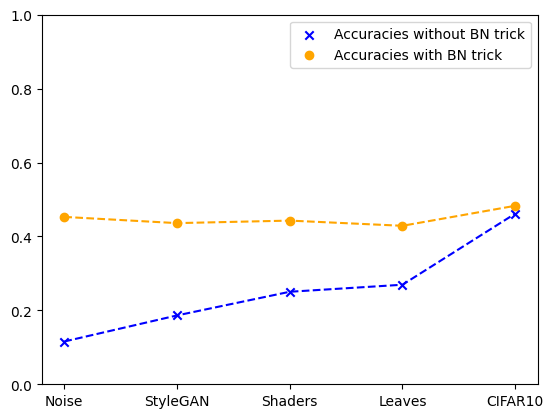

In [12]:
data = list(accuracies_wo_10.keys())
acc_wo = list(accuracies_wo_10.values())
acc_with = list(accuracies_with_10.values())



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("plots/CIFAR10_SSL_eps_10.png")